In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True, reshape=False)

train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels

print('train_labels', train_labels.shape)
print('train_dataset', train_dataset.shape)
print('validation_labels', validation_labels.shape)
print('validation_dataset', validation_dataset.shape)
print('test_labels', test_labels.shape)
print('test_dataset', test_dataset.shape, '\n')

train_dataset = np.pad(train_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
validation_dataset = np.pad(validation_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
test_dataset = np.pad(test_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

print('train_dataset', train_dataset.shape)
print('validation_dataset', validation_dataset.shape)
print('test_dataset', test_dataset.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
train_labels (55000, 10)
train_dataset (55000, 28, 28, 1)
validation_labels (5000, 10)
validation_dataset (5000, 28, 28, 1)
test_labels (10000, 10)
test_dataset (10000, 28, 28, 1) 

train_dataset (55000, 32, 32, 1)
validation_dataset (5000, 32, 32, 1)
test_dataset (10000, 32, 32, 1)


In [3]:
model = Sequential()

# CONV 1
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=train_dataset.shape[1:], kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV 2
model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV 3
model.add(Conv2D(120, (5, 5), activation='relu', kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))
model.add(Flatten())

# DENSE 1
model.add(Dense(120, activation='relu', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))
model.add(Dropout(0.5))

# DENSE 2
model.add(Dense(84, activation='relu', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))
model.add(Dropout(0.5))

# OUTPUT
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))

sgd = SGD(lr=0.03, momentum=0.1, decay=0.00005, nesterov=True)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
checkpoint_file = 'K_mnist_checkpoint.hdf5'

callbacks = [
            # EarlyStopping(monitor='val_loss', patience=4,
            #               mode='min', min_delta=0.001, verbose=1),
            # EarlyStopping(monitor='val_acc', patience=4,
            #               mode='max', min_delta=0.001, verbose=1),
            ModelCheckpoint(checkpoint_file, monitor='val_acc', verbose=0,
                            save_best_only=True, save_weights_only=True,
                            mode='auto', period=1),
        ]

batch_size = 32

history = model.fit(x=train_dataset, y=train_labels, batch_size=batch_size, epochs=100,
                    verbose=2, callbacks=callbacks, validation_split=0.2,
                    validation_data=(validation_dataset, validation_labels),
                    shuffle=True, # steps_per_epoch=len(train_labels)//batch_size,
                    #validation_steps=len(validation_labels)//batch_size
                   )

model.load_weights(checkpoint_file)

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
 - 8s - loss: 0.6827 - acc: 0.7782 - val_loss: 0.1340 - val_acc: 0.9634
Epoch 2/100
 - 6s - loss: 0.2056 - acc: 0.9446 - val_loss: 0.0946 - val_acc: 0.9772
Epoch 3/100
 - 6s - loss: 0.1435 - acc: 0.9617 - val_loss: 0.0920 - val_acc: 0.9776
Epoch 4/100
 - 6s - loss: 0.1170 - acc: 0.9704 - val_loss: 0.0825 - val_acc: 0.9790
Epoch 5/100
 - 6s - loss: 0.1005 - acc: 0.9742 - val_loss: 0.0747 - val_acc: 0.9830
Epoch 6/100
 - 6s - loss: 0.0872 - acc: 0.9783 - val_loss: 0.0708 - val_acc: 0.9840
Epoch 7/100
 - 6s - loss: 0.0793 - acc: 0.9793 - val_loss: 0.0602 - val_acc: 0.9864
Epoch 8/100
 - 6s - loss: 0.0697 - acc: 0.9827 - val_loss: 0.0696 - val_acc: 0.9838
Epoch 9/100
 - 6s - loss: 0.0637 - acc: 0.9839 - val_loss: 0.0672 - val_acc: 0.9852
Epoch 10/100
 - 6s - loss: 0.0584 - acc: 0.9852 - val_loss: 0.0570 - val_acc: 0.9874
Epoch 11/100
 - 6s - loss: 0.0550 - acc: 0.9858 - val_loss: 0.0628 - val_acc: 0.9874
Epoch 12/100
 - 6s - loss

Epoch 97/100
 - 6s - loss: 0.0068 - acc: 0.9983 - val_loss: 0.0745 - val_acc: 0.9886
Epoch 98/100
 - 5s - loss: 0.0078 - acc: 0.9981 - val_loss: 0.0745 - val_acc: 0.9890
Epoch 99/100
 - 5s - loss: 0.0066 - acc: 0.9983 - val_loss: 0.0764 - val_acc: 0.9894
Epoch 100/100
 - 6s - loss: 0.0066 - acc: 0.9981 - val_loss: 0.0773 - val_acc: 0.9884


In [5]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_history(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

def print_results():
    labels_max = test_labels.argmax(axis=-1)

    predictions = model.predict_on_batch(test_dataset)
    predictions_max = predictions.argmax(axis=-1)

    total = len(labels_max)
    errors = np.sum(labels_max!=predictions_max)
    print(f'Total: {total}')
    print(f'Erros: {errors}\tAcurácia: {100.0-(errors*100/total)}%')

    cm = confusion_matrix(labels_max, predictions_max)
    plot_confusion_matrix(cm, [str(x) for x in range(10)],
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues)

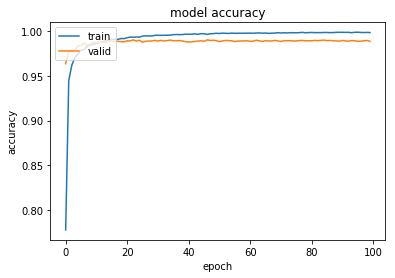

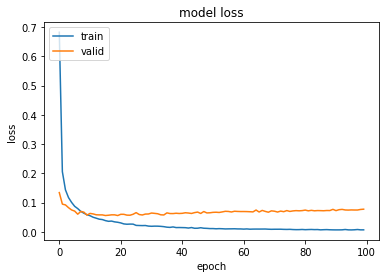

In [6]:
plot_history(history)

Total: 10000
Erros: 96	Acurácia: 99.04%
Confusion matrix, without normalization


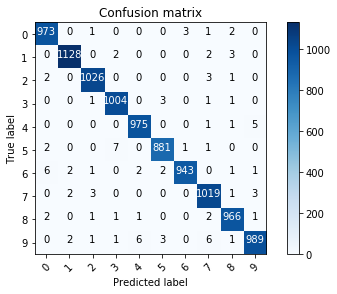

In [7]:
labels_max = test_labels.argmax(axis=-1)

predictions = model.predict_on_batch(test_dataset)
predictions_max = predictions.argmax(axis=-1)

total = len(labels_max)
errors = np.sum(labels_max!=predictions_max)
print(f'Total: {total}')
print(f'Erros: {errors}\tAcurácia: {100.0-(errors*100/total)}%')

cm = confusion_matrix(labels_max, predictions_max)
plot_confusion_matrix(cm, [str(x) for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)